# Introduction to Statistical Learning 
Introduction to Statistical Learning by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani is considered a canonical text in the field of statistical/machine learning and is an absolutely fantastic way to move forward in your analytics career. [The text is free to download](http://www-bcf.usc.edu/~gareth/ISL/) and an [online course by the authors themselves](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about) is currently available in self-pace mode, meaning you can complete it any time. Make sure to **[REGISTER FOR THE STANDFORD COURSE!](https://lagunita.stanford.edu/courses/HumanitiesSciences/StatLearning/Winter2016/about)** The videos have also been [archived here on youtube](http://www.r-bloggers.com/in-depth-introduction-to-machine-learning-in-15-hours-of-expert-videos/).

In [1]:
!ls data

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Chapter 5 Resampling Methods
Covers resampling data through bootstraping and cross validation. Cross validation gets us an error estimate for our test data and boostraping provides estimates for parameter accuracy.

### Cross Validation
Usually a test set is not available so a simple strategy to create one is to split the available data into training and testing (validation set). For quantitative responses usually use MSE, for categorical can use error rate, area under the curve, F1 score, weighting of confusion matrix, etc...

### Leave One Out Cross Validation
LOOCV has only one observation in the test set and uses all other n-1 observations to build a model. n different models are built leaving out each observation once and error is averaged over these n trials.  LOOCV is better than simple method above. Model is built on nearly all the data and there is no randomness in the splits since each observation will be left out once. It is computationally expensive especially with large n and a complex model.

### k-fold cross validation
Similar to LOOCV but this time you leave some number greater than 1 out. Here, k is the number of partitions of your sample, so if you have 1000 observations and k = 10, the each fold will be 100. These 100 observations would act as your test set. Get an MSE for each fold of these 100 observations and take the average. LOOCV is a special case of k-fold CV whenever k equals the number of observations.

### bias-variance tradeoff between LOOCV and k-folds
Since LOOCV trains on nearly all the data, the test error rate will generally be lower than k-fold and there for less biased. LOOCV will have higher variance since all n models will be very highly correlated to one another. Since the models won't differ much, the test error rate (which what CV is measuring) will vary more than k-fold which has fewer models that are less correlated with one another. A value of k between 5 and 10 is a good rule of thumb that balances the trade-off between bias and variance

In [2]:
# can do example where LOOCV has higher variance than k-fold

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Questions

# 1
Minimize $$Var(\alpha X + (1 - \alpha)Y)$$

Properties of variance and covariance
$$=Var(\alpha X) + Var((1 - \alpha)Y) + 2Cov(\alpha X, (1 - \alpha)Y)$$
$$=\alpha^2Var(X) + (1 - \alpha)^2Var(Y) + 2(\alpha)(1 - \alpha)(Cov(X, Y)$$

Take derivative and set to 0
$$2\alpha Var(X) - 2(1 - \alpha)Var(Y) + (2 - 4\alpha)Cov(X, Y) = 0$$
Collect terms
$$2\alpha Var(X) + 2 \alpha Var(Y) - 4\alpha Cov(X, Y) = 2Var(Y) - 2Cov(X, Y)$$
Solve for $\alpha$
$$\alpha = \frac{Var(Y) - Cov(X, Y)}{Var(X) + Var(Y) - 2Cov(X, Y)}$$

# 2
a) $\frac{n-1}{n}$  
b) $\frac{n-1}{n}$  
c) Since bootstrapping is sampling with replace, the probability of being any jth obsevation is $\frac{1}{n}$. The probability of not being the jth observation is $1 - \frac{1}{n}$. Since each draw is independent we can just multiply the probabilities together to get the probability that the jth observation is not in the sample at all

In [4]:
#2 c-f
[(1 - 1/n) **n for n in [5, 100, 10000, 100000]]

[0.3276800000000001,
 0.3660323412732292,
 0.36786104643297046,
 0.3678776017682465]

In [5]:
x = np.arange(1, 100001)
y = (1 - 1/x) ** x

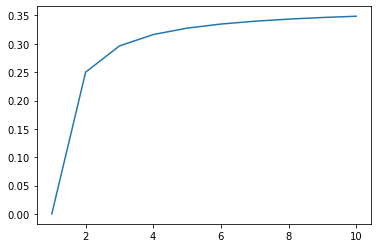

In [6]:
plt.plot(x[:10], y[:10])

In [8]:
#2h
# make 10,000 samples of 100 elements each sample from integers 1 - 100
# check if 4 is each sample. Take mean.
# Looks like very close to theoretical probability
data = np.random.randint(1, 101, (100, 10000))
np.any(data == 4, axis=0).mean()

0.6434

# 3
a) K-fold CV works by taking the dataset given and randomly splitting it into k non-overlapping datasets. You can shuffle the data first and then just split at regular intervals. Train K models. For each model, use the kth region as the validation set and build on the other k-1 sets. Take the mean of the k errors found to estimate the true test error.  

b i) Advantage to validation set is that there are more test sets to validate on which should reduce the bias of what the overall error actually is. Variance should also decrease as the validation set approach is just one split of the data and that split could not represent the test data well. Disadvantage is training more models.  

b ii) Advantage to LOOCV is a decrease in variance as the k models are not as highly correlated as the each LOOCV model is. Also, K-folds is computationally less expensive. 

# 4
* Using the bootstrap, create many (say 10,000) samples of your data.
* Create each sample by drawing n times (where n is number of observations in your original) with replacement.
* Build your model for each sample and calculate the mean and standard deviation of estimated parameters

# 5

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

In [10]:
default = pd.read_csv('data/default.csv')
default['student_yes'] = (default['student'] == 'Yes').astype('int')
default['default_yes'] = (default['default'] == 'Yes').astype('int')

In [11]:
default.head()

,default,student,balance,income,student_yes,default_yes
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,1,0
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


In [12]:
X = default[['balance', 'income']]
y = default['default_yes']

# No Validation set

### Sklearn

In [13]:
# Notice how tol must be changed to less than default value or convergence won't happen
# Use a high value of C to remove regularization
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)
model.intercept_, model.coef_

(array([-11.54046839]), array([[5.64710291e-03, 2.08089921e-05]]))

### Statsmodels
Coefficients are similar

In [14]:
import statsmodels.formula.api as smf

In [15]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        18:30:28   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### Error without validation set
This is an in-sample prediction. Training error in both sklearn and statsmodels. Both are equivalent

In [17]:
(model.predict(X) == y).mean()

0.9737

In [18]:
((result.predict(X) > .5) * 1 == y).mean()

0.9737

# Part b

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X_train, y_train)
model.intercept_, model.coef_

(array([-11.44956312]), array([[  5.66688138e-03,   1.75292951e-05]]))

In [18]:
X_train_sm = X_train.join(y_train)

In [19]:
result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.079055
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                 7500
Model:                          Logit   Df Residuals:                     7497
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Jul 2017   Pseudo R-squ.:                  0.4640
Time:                        13:09:08   Log-Likelihood:                -592.92
converged:                       True   LL-Null:                       -1106.2
                                        LLR p-value:                1.251e-223
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.4762      0.495    -23.195      0.000     -12.446     -10.506
balance        0.0057      0.000     21.659      0.000       0.005       0.006
income      1.769e-05   5.74e-06      3.083      0.002    6.44e-06    2.89e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [21]:
# Nearly the same as training set. So not too much over fitting has happened
(model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean()

(0.9624, 0.9704)

Validation error of only .0272

In [22]:
# c) repeat for 3 different validation sets
model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.075075
         Iterations 10
0.9684 0.968
Optimization terminated successfully.
         Current function value: 0.075122
         Iterations 10
0.964 0.9708
Optimization terminated successfully.
         Current function value: 0.074554
         Iterations 10
0.9708 0.9708


In [23]:
# d) include student in model
X = default[['balance', 'income', 'student_yes']]
y = default['default_yes']

model = LogisticRegression(C=100000, tol=.0000001)

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    model.fit(X_train, y_train)
    
    X_train_sm = X_train.join(y_train)
    result = smf.logit(formula='default_yes ~ balance + income + student_yes', data=X_train_sm).fit()
    print((model.predict(X_test) == y_test).mean(), ((result.predict(X_test) > .5) * 1 == y_test).mean())

Optimization terminated successfully.
         Current function value: 0.075395
         Iterations 10
0.9688 0.9688
Optimization terminated successfully.
         Current function value: 0.076060
         Iterations 10
0.9656 0.9724
Optimization terminated successfully.
         Current function value: 0.077785
         Iterations 10
0.9644 0.9708


Looks like error rate is very similar

# 6
Computing stand errors of coefficents of logistic regression using bootstrap

In [24]:
result = smf.logit(formula='default_yes ~ balance + income', data=default).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 23 Sep 2020   Pseudo R-squ.:                  0.4594
Time:                        18:38:40   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [31]:
df_params = pd.DataFrame(columns=['Intercept', 'balance', 'income'])
for i in range(1000):
    default_sample = default.sample(len(default), replace=True)
    result_sample = smf.logit(formula='default_yes ~ balance + income', data=default_sample).fit(disp=0)
    df_params = df_params.append(result_sample.params, ignore_index=True)

In [32]:
import seaborn as sns

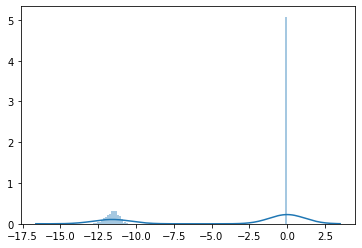

In [33]:
sns.distplot(df_params, bins=100)

In [34]:
# bootstrap parameters and standard error
df_params.mean(), df_params.std()

(Intercept   -11.585221
 balance       0.005669
 income        0.000021
 dtype: float64,
 Intercept    0.427982
 balance      0.000231
 income       0.000005
 dtype: float64)

In [35]:
# model parameters and standard error
result.params, result.bse

(Intercept   -11.540468
 balance       0.005647
 income        0.000021
 dtype: float64,
 Intercept    0.434772
 balance      0.000227
 income       0.000005
 dtype: float64)

Standard errors are a wee bit higher in bootstrap

# 7
a) Fit Logistic Regression with Lag1, Lag2

In [36]:
weekly = pd.read_csv('data/weekly.csv')

In [37]:
weekly['Direction_Up'] = (weekly['Direction'] == 'Up').astype(int)

In [38]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


In [39]:
X = weekly[['Lag1', 'Lag2']]
y = weekly['Direction_Up']

In [40]:
model = LogisticRegression(C=100000, tol=.0000001)
model.fit(X, y)

LogisticRegression(C=100000, tol=1e-07)

In [41]:
model.intercept_, model.coef_

(array([0.22122405]), array([[-0.03872222,  0.0602483 ]]))

In [42]:
# accuracy
(model.predict(X) == y).mean()

0.5555555555555556

### b) Fit without first observation

In [43]:
# model is different but nearly identical
model.fit(X.iloc[1:], y.iloc[1:])
model.intercept_, model.coef_, (model.predict(X) == y).mean()

(array([0.22324305]), array([[-0.03843317,  0.06084763]]), 0.5564738292011019)

In [44]:
# c
# wrong prediction
model.predict([X.iloc[0]]), y[0]

(array([1]), 0)

In [45]:
# d
errors = np.zeros(len(X))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    model.fit(X[leave_out], y[leave_out])
    if model.predict([X.iloc[i]]) != y[i]:
        errors[i] = 1

In [46]:
# e
errors.mean()

0.44995408631772266

# 8

In [47]:
np.random.seed(1)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

In [48]:
y.shape

(100,)

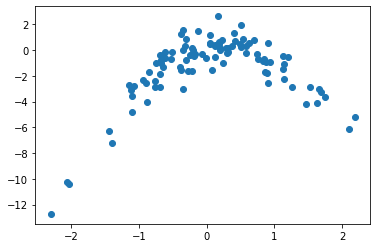

In [49]:
plt.scatter(x, y);

In [50]:
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])
df.head()

,b0,x,x2,x3,x4,y
0,1.0,1.624345,2.638498,4.285832,6.961671,-4.099779
1,1.0,-0.611756,0.374246,-0.228947,0.140060,-0.135741
2,1.0,-0.528172,0.278965,-0.147342,0.077822,-0.682611
3,1.0,-1.072969,1.151262,-1.235268,1.325403,-2.781913
4,1.0,0.865408,0.748930,0.648130,0.560897,-1.727365


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

In [53]:
# each error here is average error for linear, quadratic, cubic and quartic model.
# Looks like it stabilizes at quadratic.
errors.mean(axis=0)

array([6.26076433, 0.91428971, 0.92687688, 0.86691169])

In [54]:
# again with different seed. 
np.random.seed(2)
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e
df = pd.DataFrame(np.array([np.ones(len(x)), x, x ** 2, x ** 3, x ** 4, y]).T, columns=['b0', 'x', 'x2', 'x3', 'x4', 'y'])


X = df.iloc[:, :5]
y = df['y']
model = LinearRegression()
errors = np.zeros((len(X), 4))
for i in range(len(X)):
    leave_out  = ~X.index.isin([i])
    for j in range(4):
        model.fit(X.iloc[leave_out, :j+2], y[leave_out])
        errors[i, j] = (model.predict([X.iloc[i, :j+2]]) - y[i]) ** 2

# quite a different average error. But again stabilizes at quadratic which makes sense
errors.mean(axis=0)

array([11.61020827,  1.26528394,  1.28204182,  1.31659158])

### f 
since the error doesn't improve after quadratic it's likely the 
standard errors for x3 and x4 would not be significant

# 9

In [55]:
boston = pd.read_csv('data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [56]:
#a
boston['medv'].mean()

22.532806324110677

In [57]:
#b 
# standard deviation of mean
boston['medv'].std() / np.sqrt(len(boston))

0.40886114749753505

In [58]:
#c
#bootstrap standard deviation of mean
means = [boston['medv'].sample(n = len(boston), replace=True).mean() for i in range(1000)]
np.std(means)

0.3979281102426376

In [59]:
#d
se = np.std(means)
boston['medv'].mean() - 2 * se, boston['medv'].mean() + 2 * se

(21.7369501036254, 23.328662544595954)

http://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

In [60]:
import scipy.stats as st

In [61]:
st.t.interval(0.95, len(boston['medv'])-1, loc=np.mean(boston['medv']), scale=st.sem(boston['medv']))

(21.729528014578595, 23.33608463364276)

In [62]:
#e
boston['medv'].median()

21.2

In [63]:
#f
medians = [boston['medv'].sample(n = len(boston), replace=True).median() for i in range(1000)]
np.std(medians)

0.36780536972697897

In [64]:
#g
boston['medv'].quantile(.1)

12.75

In [66]:
#h
quantile_10 = [boston['medv'].sample(n = len(boston), replace=True).quantile(.1) for i in range(1000)]
np.std(quantile_10)

0.5018986351844363